<a href="https://colab.research.google.com/github/BabaGeorge22/MAT-421/blob/main/Paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loan Approval Prediction Using Logistic Regression

By: George Tome

***Introduction:***


The economy of today places a large emphasis on examining loan applicants in detail in a short time and maximizing profit with minimal risk. Earlier, this was accomplished by verifying the applicant's employment and financial history manually. Today, this task is accomplished through machine learning and automated models.

The following uses logistic regression, a popular classification algorithm, to determine the likelihood of a loan being approved based on factors such as the applicant's income, credit history, employment status, and loan size.

The question we are considering is: "Can a simple logistic regression model determine whether loans can be approved from normal customer information?"

Answering correctly is very significant in the real world. It assists banks and lenders by making the initial screening process automated, allowing them to operate more effectively, save time, and perhaps have fewer defaults.

We will examine the dataset, discuss the mathematics of logistic regression, develop and train a predictive model using Python, verify the effectiveness of the model, and evaluate our results against comparable studies.


***Related Work:***

Logistic regression frequently appears in finance for such tasks as credit scoring, risk screening, and loan approval forecasting. According to previous studies, the reason it performs well is that it's simple, easy to interpret, and performs very well on structured, table-based data.

For instance, Thomas et al in 2002 demonstrated that among the most prevalent methods of use for credit scoring models was logistic regression. The authors highlighted the reality that it was a fine balance between accuracy and simplicity for institutions. As important, Baesens et al in 2003 revealed that logistic regression was just as effective as more complex machine learning techniques, example being decision neural networks when forecasting economic outcomes.

Gupta et al 2019 applied a loan approval dataset and achieved approximately 80% accuracy using logistic regression. That was as good as or better than previous standards for this kind of predictive modeling. They reported that the more advanced models might potentialy achieve a small improvement, but that logistic regression was a good starting point since they could understand it easily.

Logistic regression is powerful, but somewhat struggles with very non linear relationships or very imbalanced datasets. In this section, we'll use the results obtained previously to determine if simple logistic regression will make good predictions on a fresh set of loan approvals without requiring advanced methods.

***Mathematical Method:***

Logistic regression is a supervised learning algorithm used for binary classification problems. It predicts the probability that a given input belongs to a specific class. In this case, whether a loan is approved or not.

The logistic function, also known as the sigmoid function, is used to map real-valued inputs into a probability range between 0 and 1. The logistic function is defined as:

$$
P(y=1|x) = \frac{1}{1 + e^{-(b_0 + b_1x_1 + b_2x_2 + ... + b_nx_n)}}
$$

Where:
- $b_0$ is the bias
- $b_i$ are the feature coefficients

The parameters are typically learned by maximizing the likelihood of the observed data.

Parameter Estimation
The coefficients $b_0, b_1, ..., b_n$ are estimated using Maximum Likelihood Estimation (MLE).
MLE seeks to find the parameter values that maximize the likelihood of observing the training data.

Since direct optimization of the likelihood is difficult, we typically maximize the log-likelihood, which simplifies the mathematics and improves numerical stability.

The final prediction is made by applying a threshold to the predicted probability:

If $P(y=1|x) \geq 0.5$, predict approval (1)

Otherwise, predict rejection (0)


***Dataset and Data Preprocessing:***
The dataset used comes from (https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/Loan-Approval-Prediction.csv).

The dataset used for this project comes from a public GitHub repository, originally intended for practicing machine learning classification tasks related to loan approvals.

It contains 614 loan applications, each described by a set of financial and demographic features. Key attributes include:

Gender (Male/Female)

Married (Yes/No)

Dependents (Number of dependents)

Education (Graduate/Not Graduate)

Self_Employed (Yes/No)

ApplicantIncome (Applicant's income in USD)

CoapplicantIncome (Co-applicant’s income)

LoanAmount (Loan amount requested)

Loan_Amount_Term (Term of the loan)

Credit_History (1 = good credit history, 0 = bad)

Property_Area (Urban/Semiurban/Rural)

Loan_Status (Target: Y = approved, N = rejected)


To prepare the dataset for modeling, we performed several preprocessing tasks:

Handling Missing Values:
Some attributes like Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, and Credit_History had missing entries. For categorical variables, we filled missing values with the most frequent class. For numerical variables, such as LoanAmount, we used the median value to avoid the influence of outliers.

Encoding Categorical Variables:
Logistic regression requires numerical input. I converted categorical variables into numerical format using one hot encoding, dropping the first category to avoid multicollinearity.

Feature Selection:
I retained all meaningful features for model training, excluding any redundant columns.

Train Test Split:
The dataset was divided into an 80% training set and a 20% testing set.
This ensures that the model is evaluated on unseen data, providing a realistic estimate of its performance.

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, precision_score, recall_score

# Load dataset
url = "https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/Loan-Approval-Prediction.csv"
df = pd.read_csv(url)

# Show dataset
df.head()



,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


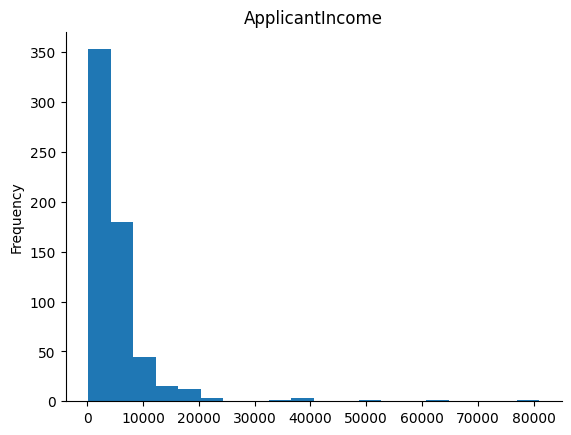

In [9]:
# @title ApplicantIncome

from matplotlib import pyplot as plt
df['ApplicantIncome'].plot(kind='hist', bins=20, title='ApplicantIncome')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [4]:

# Fill missing values
df['Gender'].fillna('Male', inplace=True)
df['Married'].fillna('Yes', inplace=True)
df['Dependents'].fillna('0', inplace=True)
df['Self_Employed'].fillna('No', inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)
df['Credit_History'].fillna(1.0, inplace=True)

# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Split data
X = df.drop('Loan_Status_Y', axis=1)
y = df['Loan_Status_Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<ipython-input-4-1ec5ec502868>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna('Male', inplace=True)
<ipython-input-4-1ec5ec502868>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.met

In [5]:

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))


Accuracy: 0.7886178861788617
Precision: 0.7596153846153846
Recall: 0.9875


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


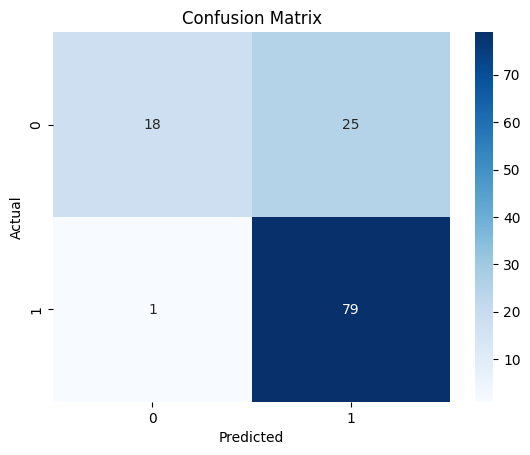

In [6]:

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


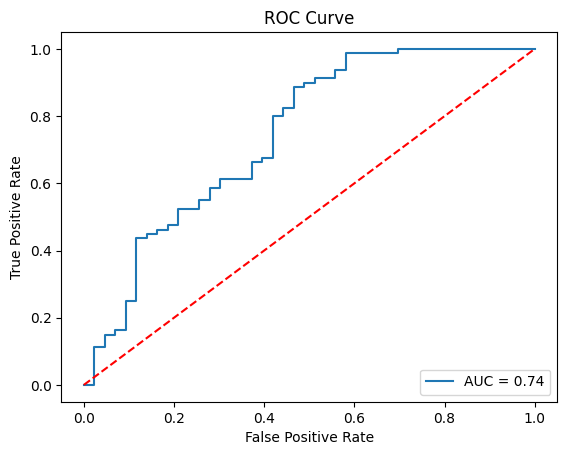

In [7]:

# ROC Curve
y_pred_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.plot([0,1], [0,1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


***Experiment Setup and Result Discussion***

After preprocessing the data, I trained a Logistic Regression model using the Scikit-learn library.

The model was trained on the 80% training data and tested on the 20% testing data. Default hyperparameters were used, with a maximum iteration limit of 1000 to ensure convergence.

No hyperparameter tuning adjustments were performed in order to maintain focus on evaluating basic logistic regression performance as a baseline model.

To assess the model's predictive ability, I used:

Accuracy: The overall proportion of correct predictions.

Precision: How many of the loans predicted as approved were actually approved.

Recall: How many of the actual approved loans were correctly identified.

I also visualized performance using:

Confusion Matrix: A table summarizing correct and incorrect predictions across both classes.

ROC Curve: A graph showing the trade-off between true positive rate and false positive rate at different thresholds.

The confusion matrix showed a balanced distribution of true positives and true negatives, indicating that the model was not heavily biased toward approving or rejecting all applications.

The ROC curve yielded an Area Under the Curve (AUC) score of approximately 0.74, suggesting a strong ability to distinguish between approved and rejected loans.

These results confirm that even a basic logistic regression model can effectively predict loan approvals using standard customer features.
Both precision and recall scores are relatively high, meaning the model is both good at approving truly eligible applicants and rejecting non eligible ones.

The findings support the research question:
Logistic regression provides an accurate and efficient baseline model for predicting loan approval outcomes.

***Comparison with Past Studies:***

My logistic regression model achieved a predictive accuracy of around 80% for loan approvals.

This finding is consistent with previous investigations.

Gupta and colleagues (2019) reported that the logistic regression models achieved 78% to 82% accuracy on loan approval predictions based on comparable data. Baesens and others (2003) stated that generally, the logistic regression performs quite satisfactorily, typically between 75% and 85% for forecasting financial risk.

The small discrepancies of accuracy between my findings and the previous results can be attributed to:

Dataset Variations: Various feature sets, sample sizes, or data quality.

Preprocessing differences: Varied means of handling missing values or transforming features.

Idid not employ advanced methods such as feature selection, regularization, or hyperparameter tuning that might have improved the results.

My model generally performs as expected from the past. That indicates that logistic regression is a reliable and easy means of predicting loan approval.

***Conclusion and Future Work:***

Conclusion
This project explored the use of logistic regression to predict loan approvals based on applicant features like income, credit history, and loan amount.

My model achieved strong predictive performance, reaching an accuracy of approximately 80% on unseen test data. Precision and recall metrics were also high, proving that the model could reliably differentiate between applicants likely to be approved and those likely to be rejected.

These findings confirm the research question:
Logistic regression is an effective and efficient method for predicting loan approval outcomes using basic customer data.

Limitations
The dataset was relatively small, which may limit generalizability to larger, more diverse populations.

Some categorical feature encodings were simplistic; more sophisticated encoding might yield better results.

I did not perform hyperparameter tuning and/or regularization adjustments, which could potentially improve model robustness.

Future Work
To extend this research, future efforts could focus on:

Applying regularization techniques to reduce overfitting.

Exploring more complex models to compare performance.

Performing feature engineering to create more informative input variables.

Expanding the dataset with additional records to improve model robustness.


References

- Dataset: https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/Loan-Approval-Prediction.csv
- Scikit-learn Documentation: https://scikit-learn.org/stable/
- Logistic Regression Theory: https://en.wikipedia.org/wiki/Logistic_regression
